In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

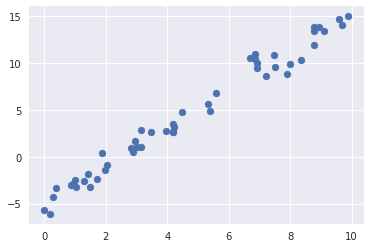

In [36]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y)

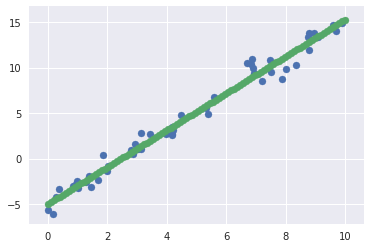

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 100)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.scatter(xfit, yfit)

In [38]:
print("Model slope:      ", model.coef_[0])
print("Model intercept:  ", model.intercept_)

Model slope:       2.0272088103606953
Model intercept:   -4.998577085553204


In [39]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2, 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.50000000000001
[ 1.5 -2.   1. ]


In [40]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [41]:
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

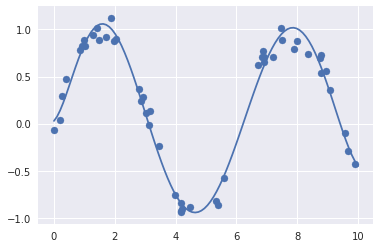

In [42]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

(0, 10)

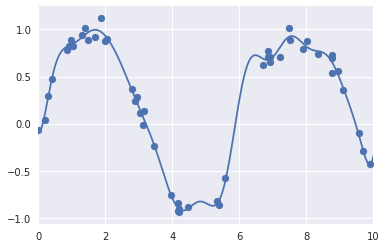

In [43]:
from sklearn.base import BaseEstimator,TransformerMixin
#自定义转换器来创建高斯基函数
class GaussianFeatures(BaseEstimator,TransformerMixin):
    def __init__(self,N,width_factor=2.0):
        self.N = N;
        self.width_factor = width_factor
    @staticmethod
    def _gauss_basis(x,y,width,axis=None):
        arg = (x-y)/width
        return np.exp(-0.5*np.sum(arg**2,axis))
    def fit(self,X,y=None):
        #在数据区间中创建N个高斯分布中心
        self.centers_ = np.linspace(X.min(),X.max(),self.N)
        self.width_ = self.width_factor*(self.centers_[1] - self.centers_[0])
        return self
    def transform(self,X):
        return self._gauss_basis(X[:,:,np.newaxis],self.centers_,self.width_,axis=1)
#训练模型及预测新数据
gauss_model = make_pipeline(GaussianFeatures(20),LinearRegression())
gauss_model.fit(x[:,np.newaxis],y)
xfit = np.linspace(0,10,1000)
yfit = gauss_model.predict(xfit[:,np.newaxis])

plt.scatter(x,y)
plt.plot(xfit,yfit)

plt.xlim(0, 10)

(-1.5, 1.5)

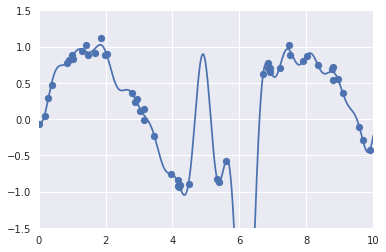

In [44]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())

model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

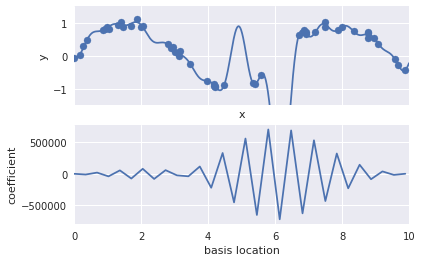

In [45]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)
        
    
    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location', ylabel='coefficient', xlim=(0, 10))

        
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

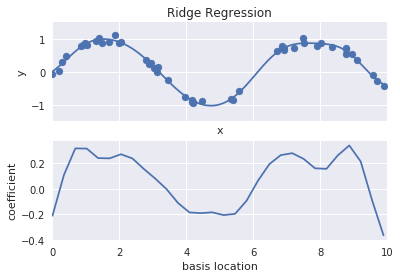

In [46]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

/home/kindleeldnik/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


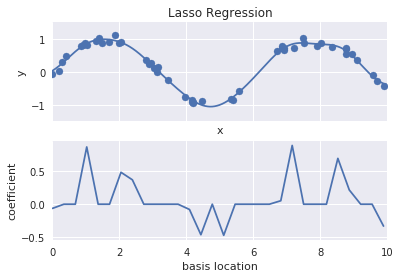

In [47]:
from sklearn.linear_model import Lasso

model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

In [48]:
import pandas as pd
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD
# !ls
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('BicycleWeather.csv', index_col='DATE', parse_dates=True)

In [49]:
daily =  counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily['Total']

In [51]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
print(daily.head)
# for i in range(7):
#     daily[days[i]] = (daily.index.dayofweek == i).astype(float)

<bound method NDFrame.head of Date
2012-10-03 00:00:00                                                14084
2012-10-04 00:00:00                                                13900
2012-10-05 00:00:00                                                12592
2012-10-06 00:00:00                                                 8024
2012-10-07 00:00:00                                                 8568
                                             ...                        
2020-08-28 00:00:00                                                 5898
2020-08-29 00:00:00                                                 5568
2020-08-30 00:00:00                                                 6006
2020-08-31 00:00:00                                                 4824
Mon                    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...
Name: Total, Length: 2891, dtype: object>


AttributeError: 'Index' object has no attribute 'dayofweek'